In [1]:
# Naive Bayes

from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:,2:4]
Y = iris.target

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, Y)

Xtest = [[5, 1.5],
         [5.2, 1.6]]

predictions = model.predict(Xtest)

import numpy as np
prior = np.array([0.33, 0.33, 0.34])

model = GaussianNB(priors=prior)
model.fit(X, Y)

model.predict(Xtest)

model.predict_proba(Xtest)

array([[9.36947976e-123, 7.65117617e-001, 2.34882383e-001],
       [1.49009794e-138, 2.44781403e-001, 7.55218597e-001]])

In [2]:
# KNN

from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:,2:4]
Y = iris.target

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5, p=2)
model.fit(X, Y)

Xtest = [[5, 1.5],
         [5.2, 1.6]]

model.predict(Xtest)

array([1, 2])

In [3]:
# Decision tree

from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:,2:4]
Y = iris.target

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X, Y)

model.predict(Xtest)

model = DecisionTreeClassifier(max_depth=5,
                              min_samples_split=2)

In [4]:
# logistic regression

# binary
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[iris.target != 2,:]
Y = iris.target[iris.target != 2]

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X, Y)

Xtest = np.array([[1, 2, 3, 4]])
model.predict(Xtest)

# Multinomial
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
Y = iris.target

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X, Y)

model = LogisticRegression(penalty='l2', C=5)

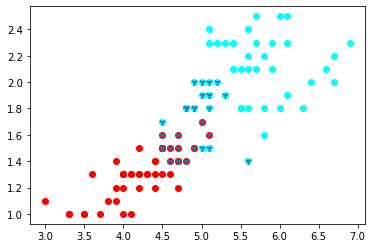

In [5]:
# SVM

from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[iris.target != 0, 2:4]
Y = iris.target[iris.target != 0]

from sklearn.svm import SVC
model = SVC()
model.fit(X, Y)

sv = model.support_vectors_
import matplotlib.pyplot as plt
plt.scatter(X[Y==1, 0], X[Y==1, 1], c='r')
plt.scatter(X[Y==2, 0], X[Y==2, 1], c='aqua')
plt.scatter(sv[:,0], sv[:,1], marker='1', s=50)
plt.show()

# kernel function

model = SVC(kernel='rbf', gamma=2)

model = SVC(kernel='linear', gamma=2)

model = SVC(kernel='poly', gamma=2, degree=3)

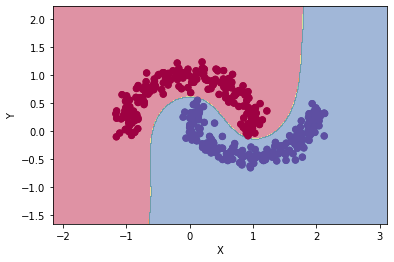

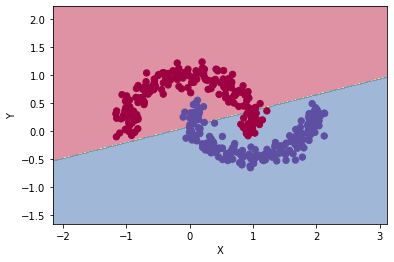

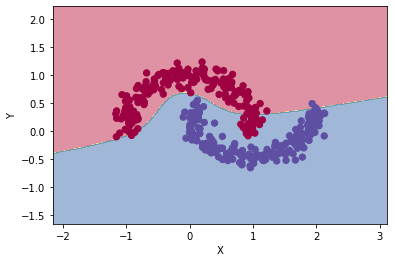

In [6]:
# SVM (contd)

#plot function
def plot_decision_boundary(model, X, Y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.5)
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=40,cmap=plt.cm.Spectral)
    plt.show()
    
from sklearn.datasets import make_moons
X, Y = make_moons(n_samples=400, shuffle=False, noise=0.1)
Y = 2 * (Y-0.5)
# Visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=Y, s=40,cmap=plt.cm.Spectral);

clfsv = SVC(kernel='rbf',gamma=1)
clfsv.fit(X, Y) 
plot_decision_boundary(clfsv, X, Y)

clfsv = SVC(kernel='linear')
clfsv.fit(X, Y) 
plot_decision_boundary(clfsv, X, Y)

clfsv = SVC(kernel='poly',gamma=1,degree=3)
clfsv.fit(X, Y) 
plot_decision_boundary(clfsv, X, Y)

In [7]:
#kfold

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

kf = KFold(n_splits=4)

for train, test in kf.split(X):
    
    model = SVC(kernel='rbf',gamma=1)
    model.fit(X[train], Y[train])
    
    test_result = model.predict(X[test])
    test_score = accuracy_score(test_result, Y[test])
    print(test_score)
    
    

0.25
0.38
0.28
0.2


In [8]:
#LOOCV

from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

for train, test in loo.split(X):
    
    model = SVC(kernel='rbf',gamma=1)
    model.fit(X[train], Y[train])
    
    test_result = clfsv.predict(X[test])
    test_score = accuracy_score(test_result, Y[test])
    print(test_score)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [9]:
# Linear regression
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
Y = np.dot(X, np.array([1, 2])) + 3

model = LinearRegression()
model.fit(X,Y)

Xtest = np.array([[1, 3]])
model.predict(Xtest)

print(model.coef_)
print(model.intercept_)

[1. 2.]
3.0000000000000018


In [10]:
# Ridge regression

import numpy as np
from sklearn.linear_model import Ridge

Y = np.random.rand(10)
X = np.random.rand(10, 3)

model = Ridge(alpha=1.0)
model.fit(X, Y)

Xtest = np.array([[1, 2, 3]])
model.predict(Xtest)

array([0.78330815])

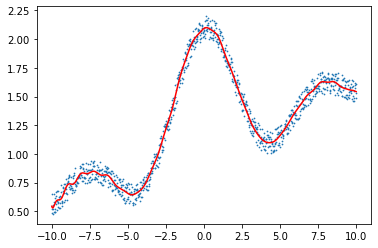

GaussianProcessRegressor(kernel=DotProduct(sigma_0=2))

In [11]:
# Gaussian process

import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
import matplotlib.pyplot as plt

n = 1000
X = np.linspace(-10, 10, num=n)
Y = 1 + X*5E-2 + np.sin(X)/X + 0.2*np.random.rand(n)

model = GaussianProcessRegressor()
model.fit(X.reshape(-1,1), Y)

Ypred = model.predict(X.reshape(-1,1))

plt.scatter(X,Y,s=0.5)
plt.plot(X,Ypred,c='r')
plt.show()

from sklearn.gaussian_process.kernels import RBF
rbf_kernel = RBF(length_scale=2.0)
model = GaussianProcessRegressor(kernel = rbf_kernel)

from sklearn.gaussian_process.kernels import DotProduct
dot_kernel = DotProduct(sigma_0=2.0)
model = GaussianProcessRegressor(kernel = dot_kernel)

model.fit(X.reshape(-1,1), Y)

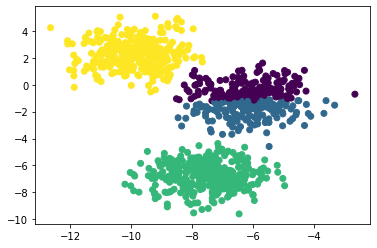

In [12]:
# kmeans

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, Y = make_blobs(n_samples=1000)

model = KMeans(n_clusters = 4, init='random')
model.fit(X)

Y_pred  = model.predict(X)
plt.scatter(X[:,0], X[:,1], c=Y_pred)
plt.show()

In [13]:
# PCA

import numpy as np
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

X = np.dot(np.random.rand(200,2) , np.random.rand(2,2))
X = normalize(X)

model = PCA(n_components=2)
model.fit(X)

model.components_ , model.explained_variance_

(array([[ 0.31596352, -0.94877134],
        [-0.94877134, -0.31596352]]),
 array([5.10464296e-03, 7.80264552e-06]))

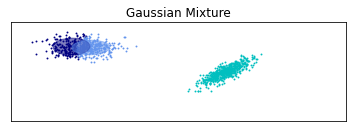

In [14]:
# Gaussian mixture

import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.mixture import GaussianMixture

color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])


def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)
    plt.xlim(-9., 5.)
    plt.ylim(-6., 6.)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)
    
    
n_samples = 500
np.random.seed(0)
C = np.array([[0.2, -0.2], [0.5, 0.8]])
X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
          .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]

gmm = GaussianMixture(n_components=3, covariance_type='full')
gmm.fit(X)

plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 0,
             "Gaussian Mixture")
plt.show()

No handles with labels found to put in legend.


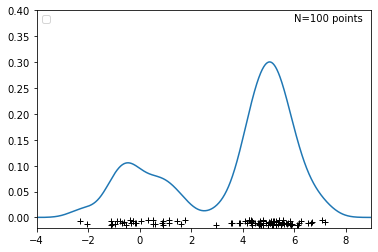

In [15]:
# Kernel Density Estimation

from scipy.stats import norm
N = 100
np.random.seed(1)
Xkde = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0])
             + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))

fig, ax = plt.subplots()

from sklearn.neighbors import KernelDensity
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(Xkde)
log_dens = kde.score_samples(X_plot)

ax.plot(X_plot[:, 0], np.exp(log_dens), '-')

ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc='upper left')
ax.plot(Xkde[:, 0], -0.005 - 0.01 * np.random.random(Xkde.shape[0]), '+k')

ax.set_xlim(-4, 9)
ax.set_ylim(-0.02, 0.4)
plt.show()

In [16]:
# MLP

from sklearn import datasets
from sklearn.neural_network import MLPClassifier

iris = datasets.load_iris()
X = iris.data
Y = iris.target

model = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(7, 7, 7),
                    activation='logistic',
                    max_iter=2000)
model.fit(X, Y)

model.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
log_dens

array([-19.33068545, -19.16816623, -19.00653649, -18.84579608,
       -18.68594483, -18.52698258, -18.36890917, -18.21172444,
       -18.05542822, -17.90002034, -17.74550064, -17.59186894,
       -17.43912506, -17.28726885, -17.13630011, -16.98621867,
       -16.83702435, -16.68871697, -16.54129634, -16.39476228,
       -16.2491146 , -16.10435311, -15.96047763, -15.81748795,
       -15.67538389, -15.53416524, -15.39383181, -15.25438339,
       -15.11581979, -14.9781408 , -14.84134622, -14.70543582,
       -14.57040942, -14.43626679, -14.30300772, -14.17063199,
       -14.03913939, -13.90852969, -13.77880268, -13.64995813,
       -13.52199582, -13.39491551, -13.26871699, -13.14340001,
       -13.01896434, -12.89540975, -12.772736  , -12.65094286,
       -12.53003007, -12.4099974 , -12.2908446 , -12.17257142,
       -12.05517762, -11.93866294, -11.82302713, -11.70826993,
       -11.59439108, -11.48139034, -11.36926742, -11.25802208,
       -11.14765403, -11.03816303, -10.92954879, -10.82